In [ ]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 6.5 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from google.colab import drive
drive.mount("/content/mydrive/")

Mounted at /content/mydrive/


In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import string

In [ ]:
train = pd.read_csv("/content/mydrive/MyDrive/train_data.csv", usecols=['Text_data','Label'])

In [ ]:
test = pd.read_csv("/content/mydrive/MyDrive/test_data.csv",usecols=['text data'])

In [ ]:
test.count()

text data    3245
dtype: int64

In [ ]:
train.groupby("Label").size()

Label
moderate          6019
not depression    1971
severe             901
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8891 entries, 0 to 8890
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text_data  8891 non-null   object
 1   Label      8891 non-null   object
dtypes: object(2)
memory usage: 139.0+ KB


#**Key**
**0** -> Moderate
**1** -> Not in depression
**2** -> Severe


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#lab_enc = LabelEncoder()
#train_clean = pd.DataFrame(lab_enc.fit_transform(train["Label"]))

In [ ]:
train_clean = train

In [ ]:
test.columns

Index(['text data'], dtype='object')

In [ ]:
train.shape

(8891, 2)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def cleaning(dataset):
  dataset = dataset.lower()
  dataset = re.sub("[%s]"%string.punctuation,"",dataset)
  dataset = re.sub("[0-9]","",dataset)
  dataset = re.sub('[‘’“”…]', '', dataset)
  #dataset = re.sub('[''""...]','',dataset)
  return dataset

In [ ]:
train_clean["Text_data"] = train_clean["Text_data"].apply(cleaning)
test_clean = pd.DataFrame(test["text data"].apply(cleaning))

In [ ]:
#tokenization
train_clean["Text_data"] = train_clean["Text_data"].apply(lambda x : x.split())
test_clean["text data"] = test_clean["text data"].apply(lambda x : x.split())

In [ ]:
train_clean.head()

,Text_data,Label
0,"[waiting, for, my, mind, to, have, a, breakdow...",moderate
1,"[my, new, years, resolution, im, gonna, get, m...",moderate
2,"[new, year, somone, else, feeling, like, will,...",moderate
3,"[my, story, i, guess, hi, im, from, germany, a...",moderate
4,"[sat, in, the, dark, and, cried, myself, going...",moderate


In [ ]:
#removing stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
for i in range(len(stop_words)):
  stop_words[i] = stop_words[i].replace("'","")
stop_words.append("im")
def stop_words_removal(dataset):
  st = [i for i in dataset if i not in stop_words]
  return st

In [ ]:
train_clean["Text_data"]= train_clean["Text_data"].apply(lambda x : stop_words_removal(x))
test_clean["text data"]= test_clean["text data"].apply(lambda x : stop_words_removal(x))

In [ ]:
test_clean.head()

,text data
0,scared lie every day say ill make think might ...
1,new wanted vent finally realized kind bad ment...
2,sad kinda always issue say bad peer definitely...
3,lonely alone immediately family member dead da...
4,year trash know posting even know talking fami...


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#lemmatization
wnl = nltk.WordNetLemmatizer()
def lemmatizing(dataset):
  l = [wnl.lemmatize(i) for i in dataset]
  return l

In [ ]:
train_clean["Text_data"] = train_clean["Text_data"].apply(lambda x : lemmatizing(x))
test_clean["text data"] = test_clean["text data"].apply(lambda x : lemmatizing(x))

In [ ]:
#clean text
def joining(dataset):
  text = " ".join(i for i in dataset)
  return text

In [ ]:
train_clean.head()

,Text_data,Label
0,"[waiting, mind, breakdown, new, year, feeling,...",moderate
1,"[new, year, resolution, gonna, get, as, therap...",moderate
2,"[new, year, somone, else, feeling, like, last,...",moderate
3,"[story, guess, hi, germany, english, mostly, s...",moderate
4,"[sat, dark, cried, going, new, year, great, st...",moderate


In [ ]:
train_clean["Text_data"] = train_clean["Text_data"].apply(lambda x : joining(x))
test_clean["text data"] = test_clean["text data"].apply(lambda x : joining(x))

In [ ]:
train_clean.head()

,Text_data,Label
0,waiting mind breakdown new year feeling anymor...,moderate
1,new year resolution gonna get as therapist off...,moderate
2,new year somone else feeling like last year ea...,moderate
3,story guess hi germany english mostly self lea...,moderate
4,sat dark cried going new year great start,moderate


In [ ]:
test_clean.head()

,text data
0,scared lie every day say ill make think might ...
1,new wanted vent finally realized kind bad ment...
2,sad kinda always issue say bad peer definitely...
3,lonely alone immediately family member dead da...
4,year trash know posting even know talking fami...


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(train_clean['Text_data'],train['Label'],test_size=0.25)

In [ ]:
X_train.count()

6668

In [ ]:
X_train.shape

(6668,)

In [ ]:
Y_train.shape

(6668,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2)
train_term = vectorizer.fit_transform(X_train)
test_term= vectorizer.transform(X_val)
test_term2 = vectorizer.transform(test_clean['text data'])

#**MultinomialNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model = MultinomialNB()
model.fit(train_term,Y_train)
predictions_train = model.predict(train_term)
predictions_test = model.predict(test_term)
print(predictions_test)
print('Train Accuracy:', accuracy_score(Y_train, predictions_train))
print('Validation Accuracy:', accuracy_score(Y_val, predictions_test))

['moderate' 'moderate' 'moderate' ... 'moderate' 'moderate' 'moderate']
Train Accuracy: 0.7870425914817036
Validation Accuracy: 0.7602339181286549


In [ ]:
from sklearn.metrics import classification_report
print("Validation classification report")
print(classification_report(Y_val, predictions_test))

Validation classification report
                precision    recall  f1-score   support

      moderate       0.74      1.00      0.85      1492
not depression       0.99      0.33      0.50       503
        severe       0.92      0.16      0.27       228

      accuracy                           0.76      2223
     macro avg       0.88      0.50      0.54      2223
  weighted avg       0.81      0.76      0.71      2223



In [ ]:
from mlxtend.evaluate import confusion_matrix

cmval = confusion_matrix(y_target=Y_val, 
                      y_predicted=predictions_test, 
                      binary=False)
cmval

array([[1487,    2,    3],
       [ 336,  167,    0],
       [ 192,    0,   36]])

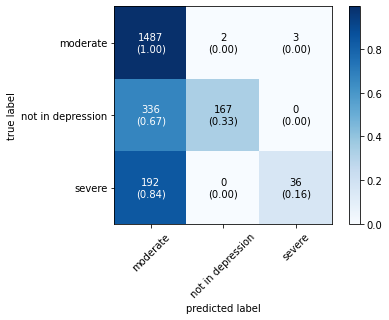

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
class_names = ['moderate', 'not in depression', 'severe']

fig, ax = plot_confusion_matrix(conf_mat=cmval,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)
plt.show()

In [ ]:
multinomialnb = test
multinomialnb["Prediction"] = model.predict(test_term2)
multinomialnb.to_csv("MultinomialNB.tsv", sep="\t")

#**LinearSVC**

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(train_term,Y_train)
predictions_train = model.predict(train_term)
predictions_test = model.predict(test_term)
print('Train Accuracy:', accuracy_score(Y_train, predictions_train))
print('Validation Accuracy:', accuracy_score(Y_val, predictions_test))

Train Accuracy: 0.9794541091781643
Validation Accuracy: 0.8735942420152947


In [ ]:
from sklearn.metrics import classification_report
print("Validation classification report")
print(classification_report(Y_val, predictions_test))

Validation classification report
                precision    recall  f1-score   support

      moderate       0.88      0.96      0.92      1492
not depression       0.85      0.68      0.76       503
        severe       0.89      0.73      0.80       228

      accuracy                           0.87      2223
     macro avg       0.87      0.79      0.82      2223
  weighted avg       0.87      0.87      0.87      2223



In [ ]:
from mlxtend.evaluate import confusion_matrix

cmval = confusion_matrix(y_target=Y_val, 
                      y_predicted=predictions_test, 
                      binary=False)
cmval

array([[1433,   48,   11],
       [ 150,  343,   10],
       [  51,   11,  166]])

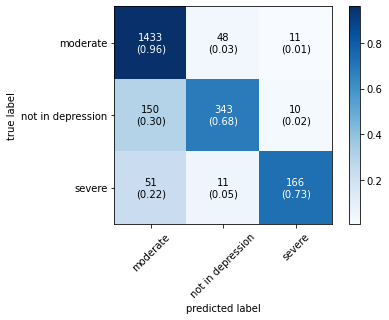

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
class_names = ['moderate', 'not in depression', 'severe']

fig, ax = plot_confusion_matrix(conf_mat=cmval,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)
plt.show()

In [ ]:
linearsvc = test
linearsvc["Prediction"] = model.predict(test_term2)
linearsvc.to_csv("LinearSVC.tsv", sep="\t")

#**Logistic Regression**

In [ ]:
#from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
#model = pipeline.Pipeline([
#    ('vectorizer', vectorizer),
#    ('clf', LogisticRegression())
#])
model.fit(train_term, Y_train)
predictions_train = model.predict(train_term)
predictions_val = model.predict(test_term)
print('Train Accuracy:', accuracy_score(Y_train, predictions_train))
print('Validation Accuracy:', accuracy_score(Y_val, predictions_test))

Train Accuracy: 0.9794541091781643
Validation Accuracy: 0.8735942420152947


In [ ]:
from sklearn.metrics import classification_report
print("Validation classification report")
print(classification_report(Y_val, predictions_test))

Validation classification report
                precision    recall  f1-score   support

      moderate       0.88      0.96      0.92      1492
not depression       0.85      0.68      0.76       503
        severe       0.89      0.73      0.80       228

      accuracy                           0.87      2223
     macro avg       0.87      0.79      0.82      2223
  weighted avg       0.87      0.87      0.87      2223



In [ ]:
from mlxtend.evaluate import confusion_matrix

cmval = confusion_matrix(y_target=Y_val, 
                      y_predicted=predictions_test, 
                      binary=False)
cmval

array([[1433,   48,   11],
       [ 150,  343,   10],
       [  51,   11,  166]])

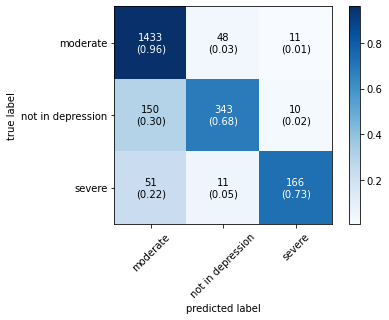

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
class_names = ['moderate', 'not in depression', 'severe']

fig, ax = plot_confusion_matrix(conf_mat=cmval,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)
plt.show()

In [ ]:
logreg = test
logreg["Prediction"] = model.predict(test_term2)
logreg.to_csv("LogisticRegression.tsv", sep="\t")

#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)
model.fit(train_term,Y_train)
predictions_train = model.predict(train_term)
predictions_test = model.predict(test_term)
print('Train Accuracy:', accuracy_score(Y_train, predictions_train))
print('Validation Accuracy:', accuracy_score(Y_val, predictions_test))

Train Accuracy: 0.9854529094181164
Validation Accuracy: 0.8722447143499775


In [ ]:
from sklearn.metrics import classification_report
print("Validation classification report")
print(classification_report(Y_val, predictions_test))

Validation classification report
                precision    recall  f1-score   support

      moderate       0.85      0.98      0.91      1492
not depression       0.91      0.65      0.76       503
        severe       0.99      0.65      0.78       228

      accuracy                           0.87      2223
     macro avg       0.92      0.76      0.82      2223
  weighted avg       0.88      0.87      0.87      2223



In [ ]:
from mlxtend.evaluate import confusion_matrix

cmval = confusion_matrix(y_target=Y_val, 
                      y_predicted=predictions_test, 
                      binary=False)
cmval

array([[1462,   28,    2],
       [ 174,  329,    0],
       [  75,    5,  148]])

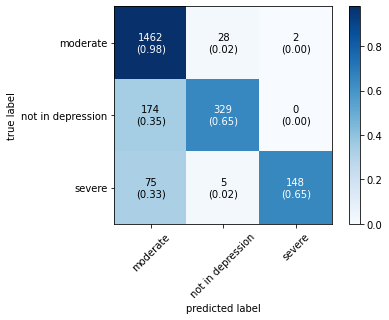

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
class_names = ['moderate', 'not in depression', 'severe']

fig, ax = plot_confusion_matrix(conf_mat=cmval,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)
plt.show()

In [ ]:
randforest = test
randforest["Prediction"] = model.predict(test_term2)
randforest.to_csv("RandomForest.tsv", sep="\t")